In [1]:
import requests
import json
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Extract

## Domain

In [2]:
'''Baca file/API domain '''

try:
    with open("data/domain_kabkot.json") as d:
        if d:
            domain_json = d.read()
            domain_json = json.loads(domain_json)
            d.close()

        print("Data kabkot diambil dari file lokal")

    with open("data/domain_prov.json") as d:
        if d:
            domain_json_prov = d.read()
            domain_json_prov = json.loads(domain_json_prov)
            d.close()

        print("Data prov diambil dari file lokal")

except FileNotFoundError:
    domain_resp = requests.get('https://webapi.bps.go.id/v1/api/domain/type/kab/key/d4c6b79d2a92a08083fc9ed812cc727e/')
    domain_json = domain_resp.json()
    domain = json.dumps(domain_json)

    with open("data/domain_kabkot.json", "w") as w:
        w.write(domain)
    
    domain_resp_prov = requests.get('https://webapi.bps.go.id/v1/api/domain/type/prov/key/d4c6b79d2a92a08083fc9ed812cc727e/')
    domain_json_prov = domain_resp_prov.json()
    domain = json.dumps(domain_json_prov)

    with open("data/domain_prov.json", "w") as w:
        w.write(domain)

    print("Data diambil dari API")

Data kabkot diambil dari file lokal
Data prov diambil dari file lokal


List kode kabupaten/kota dan namanya. Variabel domain_data berisi list tuple kode kabupaten/kota dan namanya. List kode provinsi dan namanya. Variabel domain_provinsi berisi list tuple kode provinsi dan namanya

In [4]:
id_list = [domain_json['data'][1][i]['domain_id'] for i in range(len(domain_json['data'][1]))]
name_list = [domain_json['data'][1][i]['domain_name'] for i in range(len(domain_json['data'][1]))]

In [5]:
domain_data = list()
for i,j in zip(id_list, name_list):
    domain_data.append((i,j))

In [ ]:
domain_data

In [7]:
l = len(domain_json_prov['data'][1])

kode_provinsi = [domain_json_prov['data'][1][i]['domain_id'] for i in range(l)]
nama_provinsi = [domain_json_prov['data'][1][i]['domain_name'] for i in range(l)]

In [8]:
domain_provinsi = list()
for i,j in zip(kode_provinsi, nama_provinsi):
    domain_provinsi.append((i,j))

In [9]:
kode_provinsi

['1100',
 '1200',
 '1300',
 '1400',
 '1500',
 '1600',
 '1700',
 '1800',
 '1900',
 '2100',
 '3100',
 '3200',
 '3300',
 '3400',
 '3500',
 '3600',
 '5100',
 '5200',
 '5300',
 '6100',
 '6200',
 '6300',
 '6400',
 '6500',
 '7100',
 '7200',
 '7300',
 '7400',
 '7500',
 '7600',
 '8100',
 '8200',
 '9100',
 '9400']

In [10]:
for i in range(len(domain_provinsi)):
    d = domain_provinsi[i][1].lower().split()
    
    filename_prov = domain_provinsi[i][0] + '-' + ''.join(d)

In [35]:
kode_provinsi = []

for i in id_list:
    kode_provinsi.append(i[0:2] + "00")

kode_provinsi_data = list(dict.fromkeys(kode_provinsi))

print(kode_provinsi_data)

['1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900', '2100', '3100', '3200', '3300', '3400', '3500', '3600', '5100', '5200', '5300', '6100', '6200', '6300', '6400', '6500', '7100', '7200', '7300', '7400', '7500', '7600', '8100', '8200', '9100', '9400']


## Jumlah Penduduk

In [12]:
''' '''

try:
    with open("data/jumlahpenduduk_aceh.json", "r") as d:
        if d:
            penduduk_aceh = d.read()
            penduduk_aceh = json.loads(penduduk_aceh)
        d.close()
        
    print("Data Lokal")
except FileNotFoundError:  
    data_resp = requests.get("https://webapi.bps.go.id/v1/api/list/model/data/domain/1100/var/55/th/122/key/d4c6b79d2a92a08083fc9ed812cc727e/")
    data_json = data_resp.json()
    data_write = json.dumps(data_json)
    
    with open("data/jumlahpenduduk_aceh.json", "w") as w:
        w.write(data_write)
        w.close()
    
    print("Data API")

Data Lokal


In [13]:
# rincian data ada di notebook BPS
jumlah_penduduk_request = [55, 65, 32, 32, 32, 
                    813, 28, 187, 33, 48,
                    111, 133, 766, 133, 120,
                    46, 28, 29, 531, 42,
                    26, 91, 28, 28, 45,
                    28, 49, 371, 44, 29,
                    92, 29, 146, 51]

In [40]:
i = 0
data_json = list()

for i in range(len(kode_provinsi_data)):
    data_resp = requests.get("https://webapi.bps.go.id/v1/api/list/model/data/domain/" + str(kode_provinsi_data[i]) + "/var/" + str(jumlah_penduduk_request[i]) + "/th/122/key/d4c6b79d2a92a08083fc9ed812cc727e/")
    data_json.append(data_resp.json())

In [28]:
print(len(kode_provinsi_data),len(jumlah_penduduk_request))

34 34


In [46]:
data_json[1])

{'status': 'OK',
 'data-availability': 'available',
 'var': [{'val': 65,
   'label': 'Jumlah Penduduk menurut Jenis Kelamin dan Kabupaten/Kota',
   'unit': 'Jiwa',
   'subj': 'Kependudukan',
   'def': '',
   'decimal': '0',
   'note': 'Data Proyeksi Penduduk Sp2010\n* Backcasting untuk Nias dan Nias Barat'}],
 'turvar': [{'val': 314, 'label': 'Jumlah'},
  {'val': 315, 'label': 'Perempuan'},
  {'val': 316, 'label': 'Laki-Laki'}],
 'labelvervar': 'Kabupaten Kota',
 'vervar': [{'val': 1201, 'label': 'Nias'},
  {'val': 1202, 'label': 'Mandailing Natal'},
  {'val': 1203, 'label': 'Tapanuli Selatan'},
  {'val': 1204, 'label': 'Tapanuli Tengah'},
  {'val': 1205, 'label': 'Tapanuli Utara'},
  {'val': 1206, 'label': 'Toba'},
  {'val': 1207, 'label': 'Labuhan Batu'},
  {'val': 1208, 'label': 'Asahan'},
  {'val': 1209, 'label': 'Simalungun'},
  {'val': 1210, 'label': 'Dairi'},
  {'val': 1211, 'label': 'Karo'},
  {'val': 1212, 'label': 'Deli Serdang'},
  {'val': 1213, 'label': 'Langkat'},
  {'val'

In [14]:
penduduk_aceh

{'status': 'OK',
 'data-availability': 'available',
 'var': [{'val': 55,
   'label': 'Jumlah Penduduk',
   'unit': 'Jiwa',
   'subj': 'Kependudukan',
   'def': '-',
   'decimal': '',
   'note': '-'}],
 'turvar': [{'val': 0, 'label': 'Tidak Ada'}],
 'labelvervar': 'Kabupaten/Kota &amp; Provinsi',
 'vervar': [{'val': 1199, 'label': 'PROVINSI ACEH'},
  {'val': 1101, 'label': 'SIMEULUE'},
  {'val': 1102, 'label': 'ACEH SINGKIL'},
  {'val': 1103, 'label': 'ACEH SELATAN'},
  {'val': 1104, 'label': 'ACEH TENGGARA'},
  {'val': 1105, 'label': 'ACEH TIMUR'},
  {'val': 1106, 'label': 'ACEH TENGAH'},
  {'val': 1107, 'label': 'ACEH BARAT'},
  {'val': 1108, 'label': 'ACEH BESAR'},
  {'val': 1109, 'label': 'PIDIE'},
  {'val': 1110, 'label': 'BIREUEN'},
  {'val': 1111, 'label': 'ACEH UTARA'},
  {'val': 1112, 'label': 'ACEH BARAT DAYA'},
  {'val': 1113, 'label': 'GAYO LUES'},
  {'val': 1114, 'label': 'ACEH TAMIANG'},
  {'val': 1115, 'label': 'NAGAN RAYA'},
  {'val': 1116, 'label': 'ACEH JAYA'},
  {'val

In [15]:
df_label = pd.DataFrame(penduduk_aceh['vervar'], penduduk_aceh['datacontent'])
df_penduduk = pd.Series(penduduk_aceh['datacontent'])

In [17]:
df = pd.merge(df_label, df_penduduk.rename("penduduk2022"), left_index = True, right_index = True)

In [23]:
df = df.sort_values(by="penduduk2022", ascending=False)

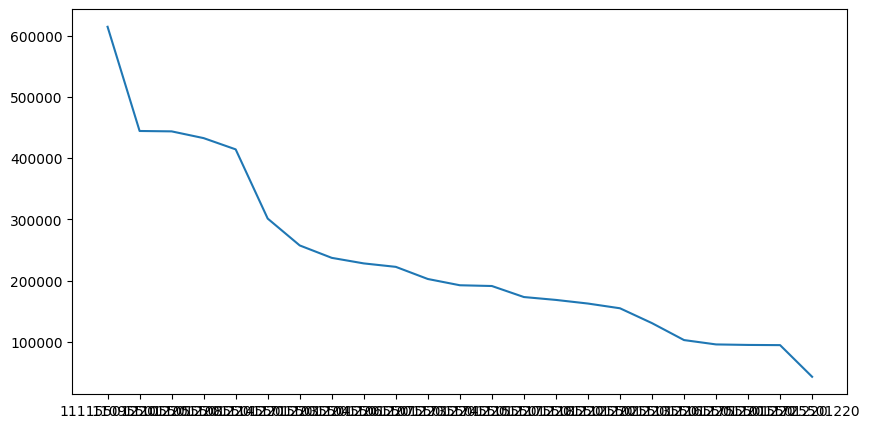

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df.iloc[1:, 2],)
plt.show()

In [12]:
id_list = [domain_json['data'][1][i]['domain_id'] for i in range(len(domain_json['data'][1]))]
name_list = [domain_json['data'][1][i]['domain_name'] for i in range(len(domain_json['data'][1]))]

domain_data = list()
for i,j in zip(id_list, name_list):
    domain_data.append((i,j))

In [13]:
for i in
data_json[0]['datacontent'][i]

SyntaxError: invalid syntax (2600543828.py, line 1)

In [37]:
def get_bps_data(domain, variable):
    '''
    Extract data from BPS API, not yet include API requests which come before this method
    Output: (data_key, nama_daerah, value)
    '''


def rebuild_data_key(data):
    '''
    Fungsi: kamus metadata BPS API pribadi
    Output: string kode data [valueid_daerah + valueid_variable + valueid_turunan variable + valueid_tahun + valueid_turunan tahun]
    Bisa jadi module?
    '''

    content_key = ['var', 'turvar', 'tahun', 'turtahun']
        
    list_valueid = data['vervar'][1:len(data['vervar'])]
    list_valueid = [list_valueid[x]['val'] for x in range(len(list_valueid))]
    
    list_var = [data[f'%s', data][x]['val'] for x in range(len(data_json["var"]))] * len(list_value)
    list_turvar = [data['turvar'][x]['val'] for x in range(len(data_json['turvar']))] * len(list_value)
    list_tahun = [data['tahun'][x]['val'] for x in range(len(data['tahun']))] * len(list_value)
    list_turtahun = [data['turtahun'][x]['val'] for x in range(len(data['turtahun']))] * len(list_value)

    data_key = []
    
    for i in range(len(list_value)):
        data_key.append(tr(list_value[i]) + 
              str(list_var[i]) +
              str(list_turvar[i]) +
              str(list_tahun[i]) +
              str(list_turtahun[i]))

    return "".join(data_key)

In [38]:
kode_penduduk_aceh = rebuild_data_key(penduduk_aceh)

TypeError: list indices must be integers or slices, not str

Buat tabel domain_prov di database

# Load

In [44]:
conn = psycopg2.connect("host=localhost dbname=bps_data user=postgres password=postgres")
cur = conn.cursor()
# https://www.postgresqltutorial.com/postgresql-python/connect/

### Kabupaten Kota

In [127]:
conn.rollback()
cur.execute("CREATE TABLE domain_kabkot (id serial PRIMARY KEY, domain_id varchar(4), nama_kabkot varchar);")

conn.commit()

In [131]:
conn.rollback()
for d in domain_data:
        cur.execute("INSERT INTO domain_kabkot (domain_id, nama_kabkot) VALUES (%s, %s)", (d[0],d[1]))
cur.execute("SELECT * FROM domain_kabkot;")
conn.commit()

cur.fetchone()

(1029, '1101', 'Simeulue')

### Provinsi

In [45]:
conn.rollback()
cur.execute("CREATE TABLE domain_prov (id serial PRIMARY KEY, domain_id varchar(4), nama_provinsi varchar);")

conn.commit()

In [49]:
conn.rollback()
for d in domain_provinsi:
        cur.execute("INSERT INTO domain_prov (domain_id, nama_provinsi) VALUES (%s, %s)", (d[0],d[1]))
cur.execute("SELECT * FROM domain_prov;")
conn.commit()

cur.fetchall()

(1, '1100', 'Aceh')

In [51]:
cur.execute("SELECT * FROM domain_prov;")
cur.fetchall()

[(1, '1100', 'Aceh'),
 (2, '1200', 'Sumatera Utara'),
 (3, '1300', 'Sumatera Barat'),
 (4, '1400', 'Riau'),
 (5, '1500', 'Jambi'),
 (6, '1600', 'Sumatera Selatan'),
 (7, '1700', 'Bengkulu'),
 (8, '1800', 'Lampung'),
 (9, '1900', 'Kep. Bangka Belitung'),
 (10, '2100', 'Kep. Riau'),
 (11, '3100', 'Dki Jakarta'),
 (12, '3200', 'Jawa Barat'),
 (13, '3300', 'Jawa Tengah'),
 (14, '3400', 'Di Yogyakarta'),
 (15, '3500', 'Jawa Timur'),
 (16, '3600', 'Banten'),
 (17, '5100', 'Bali'),
 (18, '5200', 'Nusa Tenggara Barat'),
 (19, '5300', 'Nusa Tenggara Timur'),
 (20, '6100', 'Kalimantan Barat'),
 (21, '6200', 'Kalimantan Tengah'),
 (22, '6300', 'Kalimantan Selatan'),
 (23, '6400', 'Kalimantan Timur'),
 (24, '6500', 'Kalimantan Utara'),
 (25, '7100', 'Sulawesi Utara'),
 (26, '7200', 'Sulawesi Tengah'),
 (27, '7300', 'Sulawesi Selatan'),
 (28, '7400', 'Sulawesi Tenggara'),
 (29, '7500', 'Gorontalo'),
 (30, '7600', 'Sulawesi Barat'),
 (31, '8100', 'Maluku'),
 (32, '8200', 'Maluku Utara'),
 (33, '9100

In [123]:
conn.close()